# Geographic Visualizations In Cartopy

In [ ]:
# Installing Cartopy
!conda install -c conda-forge cartopy

# Import Cartopy 

In [2]:
from cartopy import crs, feature
import matplotlib.pyplot as plt

# Sample Geographical Map

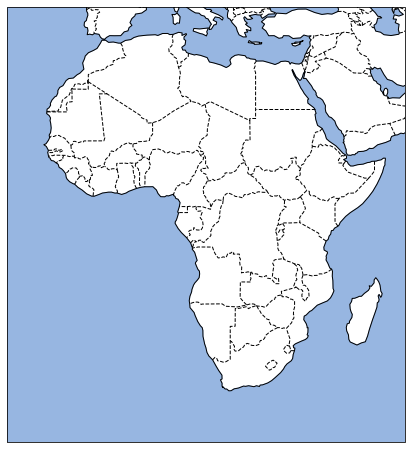

In [57]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection = crs.PlateCarree() )

ax.coastlines()
ax.add_feature(feature.BORDERS, linestyle='dashed')
ax.add_feature(feature.OCEAN)

ax.set_extent( [-25, 55, -37.5, 35] )

In [16]:
import xarray as xr

In [18]:
ds_Africa = xr.open_dataset('Africa_cru_data.nc')
da_RR = ds_Africa.pre

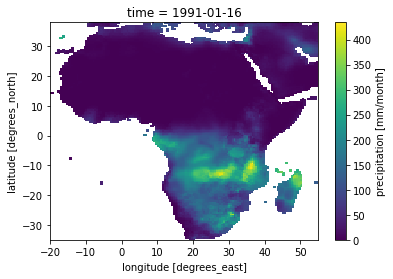

In [21]:
da_RR.sel(time='1991-01').plot()

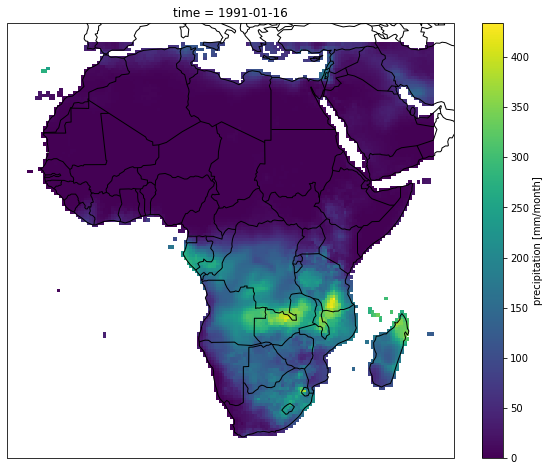

In [32]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax1.coastlines()
ax1.add_feature(feature.BORDERS)

da_RR.sel(time='1991-01').plot( ax = ax1 )



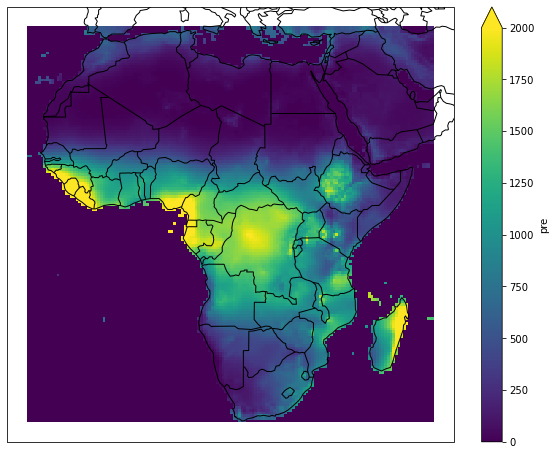

In [35]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax1.coastlines()
ax1.add_feature(feature.BORDERS)

da_RR.groupby('time.year').sum('time').mean('year').plot(ax = ax1, vmax=2000)

ax.set_extent( [-20, 55, -37, 33 ] )

In [38]:
Jan = da_RR.groupby('time.month').mean('time').sel(month=1)
Apr = da_RR.groupby('time.month').mean('time').sel(month=4)
Jun = da_RR.groupby('time.month').mean('time').sel(month=6)
Dec = da_RR.groupby('time.month').mean('time').sel(month=12)

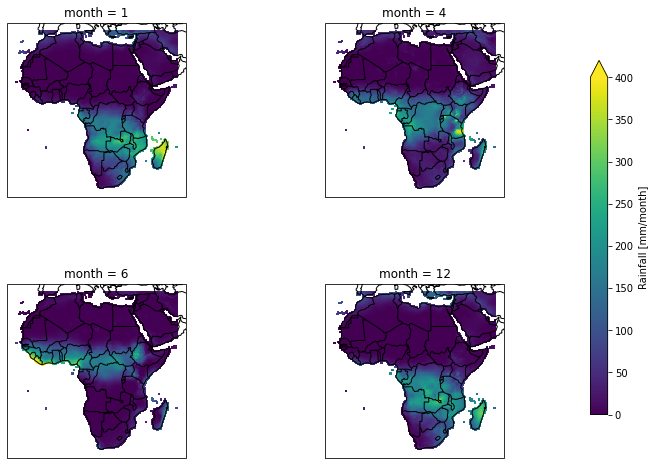

In [53]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize= (12,8), subplot_kw={'projection':crs.PlateCarree()})
plt.subplots_adjust(hspace=0.5, right=0.8)

ax1 = axes[0,0]
Jan.plot(ax = ax1 , vmax=400, add_colorbar=False)
ax1.coastlines()
ax1.add_feature(feature.BORDERS)

ax2 = axes[0,1]
Apr.plot( ax = ax2, vmax=400, add_colorbar=False)
ax2.coastlines()
ax2.add_feature(feature.BORDERS)


ax3 = axes[1,0]
Jun.plot( ax = ax3, vmax=400, add_colorbar=False)
ax3.coastlines()
ax3.add_feature(feature.BORDERS)

ax4 = axes[1,1]
cb = Dec.plot( ax = ax4, vmax=400, add_colorbar=False)
ax4.coastlines()
ax4.add_feature(feature.BORDERS)


caxes = fig.add_axes([0.85, 0.2, 0.02, 0.615])
fig.colorbar(cb, cax=caxes, orientation='vertical', label='Rainfall [mm/month]', extend='max')


In [59]:
ds = xr.open_dataset('Africa_cru_data.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

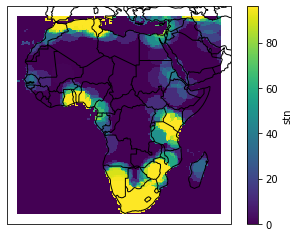

In [68]:
fig = plt.figure()
y = fig.add_subplot(projection = crs.PlateCarree() )

ds.stn.sel(time='1901').sum('time').plot( ax=y )
y.coastlines()
y.add_feature (feature.BORDERS)


# THE END